# NISQA MODEL PERFORMANCE ON TEST SET

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 300


NISQA-TTS (v1.0) results:
Pearson correlation coefficient: 0.7018125672785385
Mean absolute error: 1.002416569812625
Mean squared error: 1.4541742828811193
Root mean squared error: 1.2058914888501036
R2 score: 0.37292717671898756

NISQA (v2.0) results:
Pearson correlation coefficient: 0.5617599364221268
Mean absolute error: 1.4602012756992788
Mean squared error: 3.442329882677819
Root mean squared error: 1.8553516870603854
R2 score: -0.48441046139161026

NISQA (Finetuned) results:
Pearson correlation coefficient: 0.7298767796215686
Mean absolute error: 0.8049937661956338
Mean squared error: 1.1203094256126644
Root mean squared error: 1.0584467041909407
R2 score: 0.5168972503932705


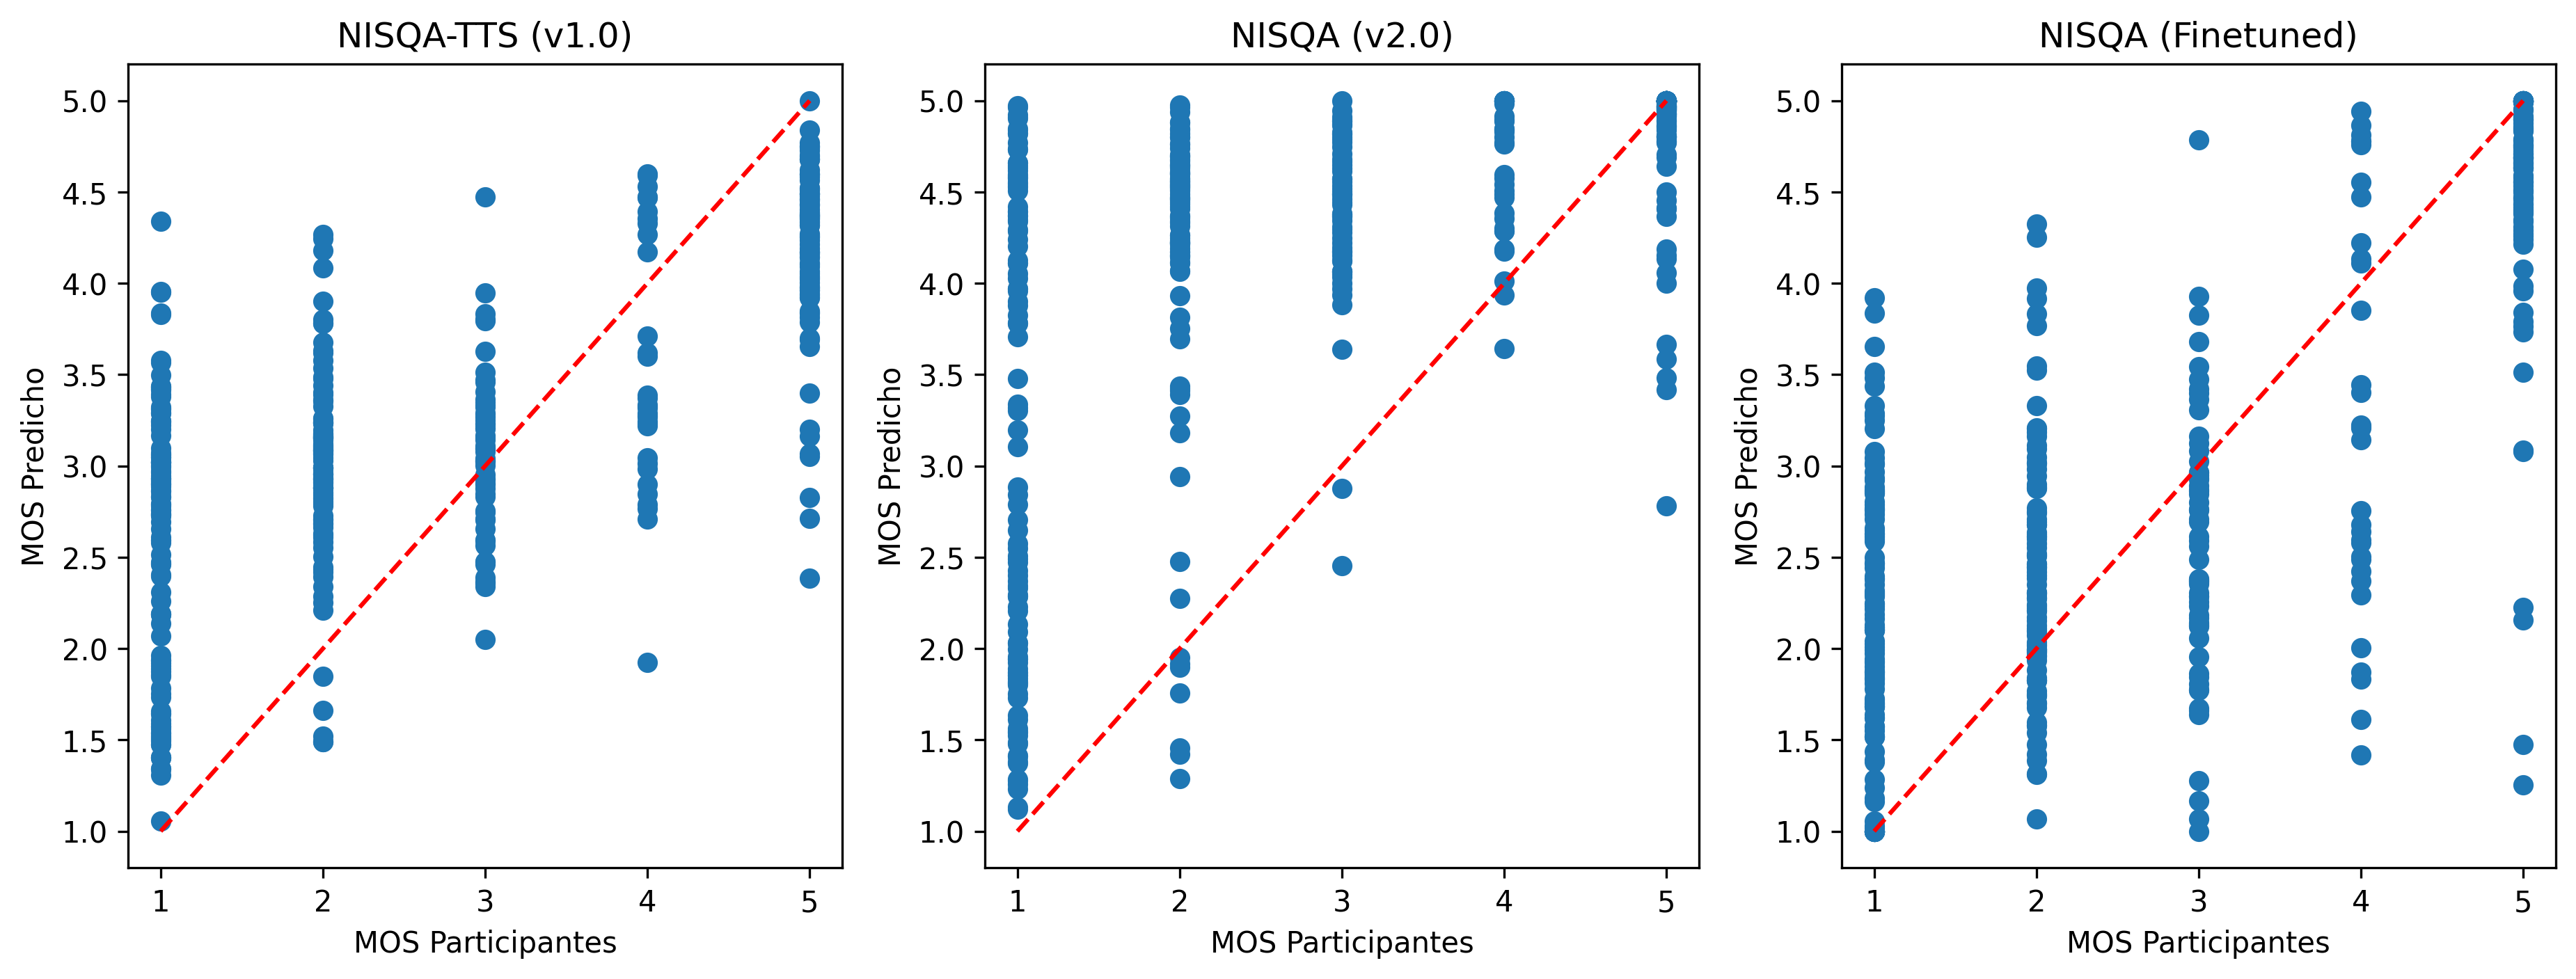

In [15]:
# read test set, NISQA-TTS (v1.0) results, and NISQA (v2.0) results
test = pd.read_csv('NISQA_results_no_finetuning/test_copy.csv')
test_for_finetuned_nisqa = pd.read_csv('finetuned_model/test_copy.csv')
NISQA_v1 = pd.read_csv('NISQA_results_no_finetuning/NISQA_v1_results.csv')
NISQA_v2 = pd.read_csv('NISQA_results_no_finetuning/NISQA_v2_results.csv')
NISQA_finetuned = pd.read_csv('finetuned_model/NISQA_custom_results.csv')

# discard every column except the 'stimuli' and 'mos_pred' columns
NISQA_v1 = NISQA_v1[['stimuli', 'mos_pred']]
NISQA_v2 = NISQA_v2[['stimuli', 'mos_pred']]
NISQA_finetuned = NISQA_finetuned[['stimuli', 'mos_pred']]

# constrain the MOS values to the range [1, 5]
NISQA_v1['mos_pred'] = NISQA_v1['mos_pred'].clip(1, 5)
NISQA_v2['mos_pred'] = NISQA_v2['mos_pred'].clip(1, 5)
NISQA_finetuned['mos_pred'] = NISQA_finetuned['mos_pred'].clip(1, 5)

# pair the NISQA-TTS (v1.0) and NISQA (v2.0) results with the test set
NISQA_v1_paired = pd.merge(test, NISQA_v1, on='stimuli')
NISQA_v2_paired = pd.merge(test, NISQA_v2, on='stimuli')
NISQA_finetuned_paired = pd.merge(test_for_finetuned_nisqa, NISQA_finetuned, on='stimuli')

# calculate the Pearson correlation coefficient
NISQA_v1_corr = NISQA_v1_paired['mos_pred'].corr(NISQA_v1_paired['mos'])
NISQA_v2_corr = NISQA_v2_paired['mos_pred'].corr(NISQA_v2_paired['mos'])
NISQA_finetuned_corr = NISQA_finetuned_paired['mos_pred'].corr(NISQA_finetuned_paired['mos'])

# compute mae, mse, rmse and r2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
mae_tts = mean_absolute_error(NISQA_v1_paired['mos'], NISQA_v1_paired['mos_pred'])
mae_2 = mean_absolute_error(NISQA_v2_paired['mos'], NISQA_v2_paired['mos_pred'])
mae_custom_1 = mean_absolute_error(NISQA_finetuned_paired['mos'], NISQA_finetuned_paired['mos_pred'])
mse_tts = mean_squared_error(NISQA_v1_paired['mos'], NISQA_v1_paired['mos_pred'])
mse_2 = mean_squared_error(NISQA_v2_paired['mos'], NISQA_v2_paired['mos_pred'])
mse_custom_1 = mean_squared_error(NISQA_finetuned_paired['mos'], NISQA_finetuned_paired['mos_pred'])
rmse_tts = root_mean_squared_error(NISQA_v1_paired['mos'], NISQA_v1_paired['mos_pred'])
rmse_2 = root_mean_squared_error(NISQA_v2_paired['mos'], NISQA_v2_paired['mos_pred'])
rmse_custom_1 = root_mean_squared_error(NISQA_finetuned_paired['mos'], NISQA_finetuned_paired['mos_pred'])
r2_tts = r2_score(NISQA_v1_paired['mos'], NISQA_v1_paired['mos_pred'])
r2_2 = r2_score(NISQA_v2_paired['mos'], NISQA_v2_paired['mos_pred'])
r2_custom_1 = r2_score(NISQA_finetuned_paired['mos'], NISQA_finetuned_paired['mos_pred'])

# print the results
print('NISQA-TTS (v1.0) results:')
print('Pearson correlation coefficient:', NISQA_v1_corr)
print('Mean absolute error:', mae_tts)
print('Mean squared error:', mse_tts)
print('Root mean squared error:', rmse_tts)
print('R2 score:', r2_tts)
print()
print('NISQA (v2.0) results:')
print('Pearson correlation coefficient:', NISQA_v2_corr)
print('Mean absolute error:', mae_2)
print('Mean squared error:', mse_2)
print('Root mean squared error:', rmse_2)
print('R2 score:', r2_2)
print()
print('NISQA (Finetuned) results:')
print('Pearson correlation coefficient:', NISQA_finetuned_corr)
print('Mean absolute error:', mae_custom_1)
print('Mean squared error:', mse_custom_1)
print('Root mean squared error:', rmse_custom_1)
print('R2 score:', r2_custom_1)


# plot the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(NISQA_v1_paired['mos'], NISQA_v1_paired['mos_pred'])
ax[0].set_title('NISQA-TTS (v1.0)')
ax[0].set_xlabel('MOS Participantes')
ax[0].set_ylabel('MOS Predicho')
ax[0].plot([1, 5], [1, 5], 'r--')
ax[1].scatter(NISQA_v2_paired['mos'], NISQA_v2_paired['mos_pred'])
ax[1].set_title('NISQA (v2.0)')
ax[1].set_xlabel('MOS Participantes')
ax[1].set_ylabel('MOS Predicho')
ax[1].plot([1, 5], [1, 5], 'r--')
ax[2].scatter(NISQA_finetuned_paired['mos'], NISQA_finetuned_paired['mos_pred'])
ax[2].set_title('NISQA (Finetuned)')
ax[2].set_xlabel('MOS Participantes')
ax[2].set_ylabel('MOS Predicho')
ax[2].plot([1, 5], [1, 5], 'r--')
plt.show()


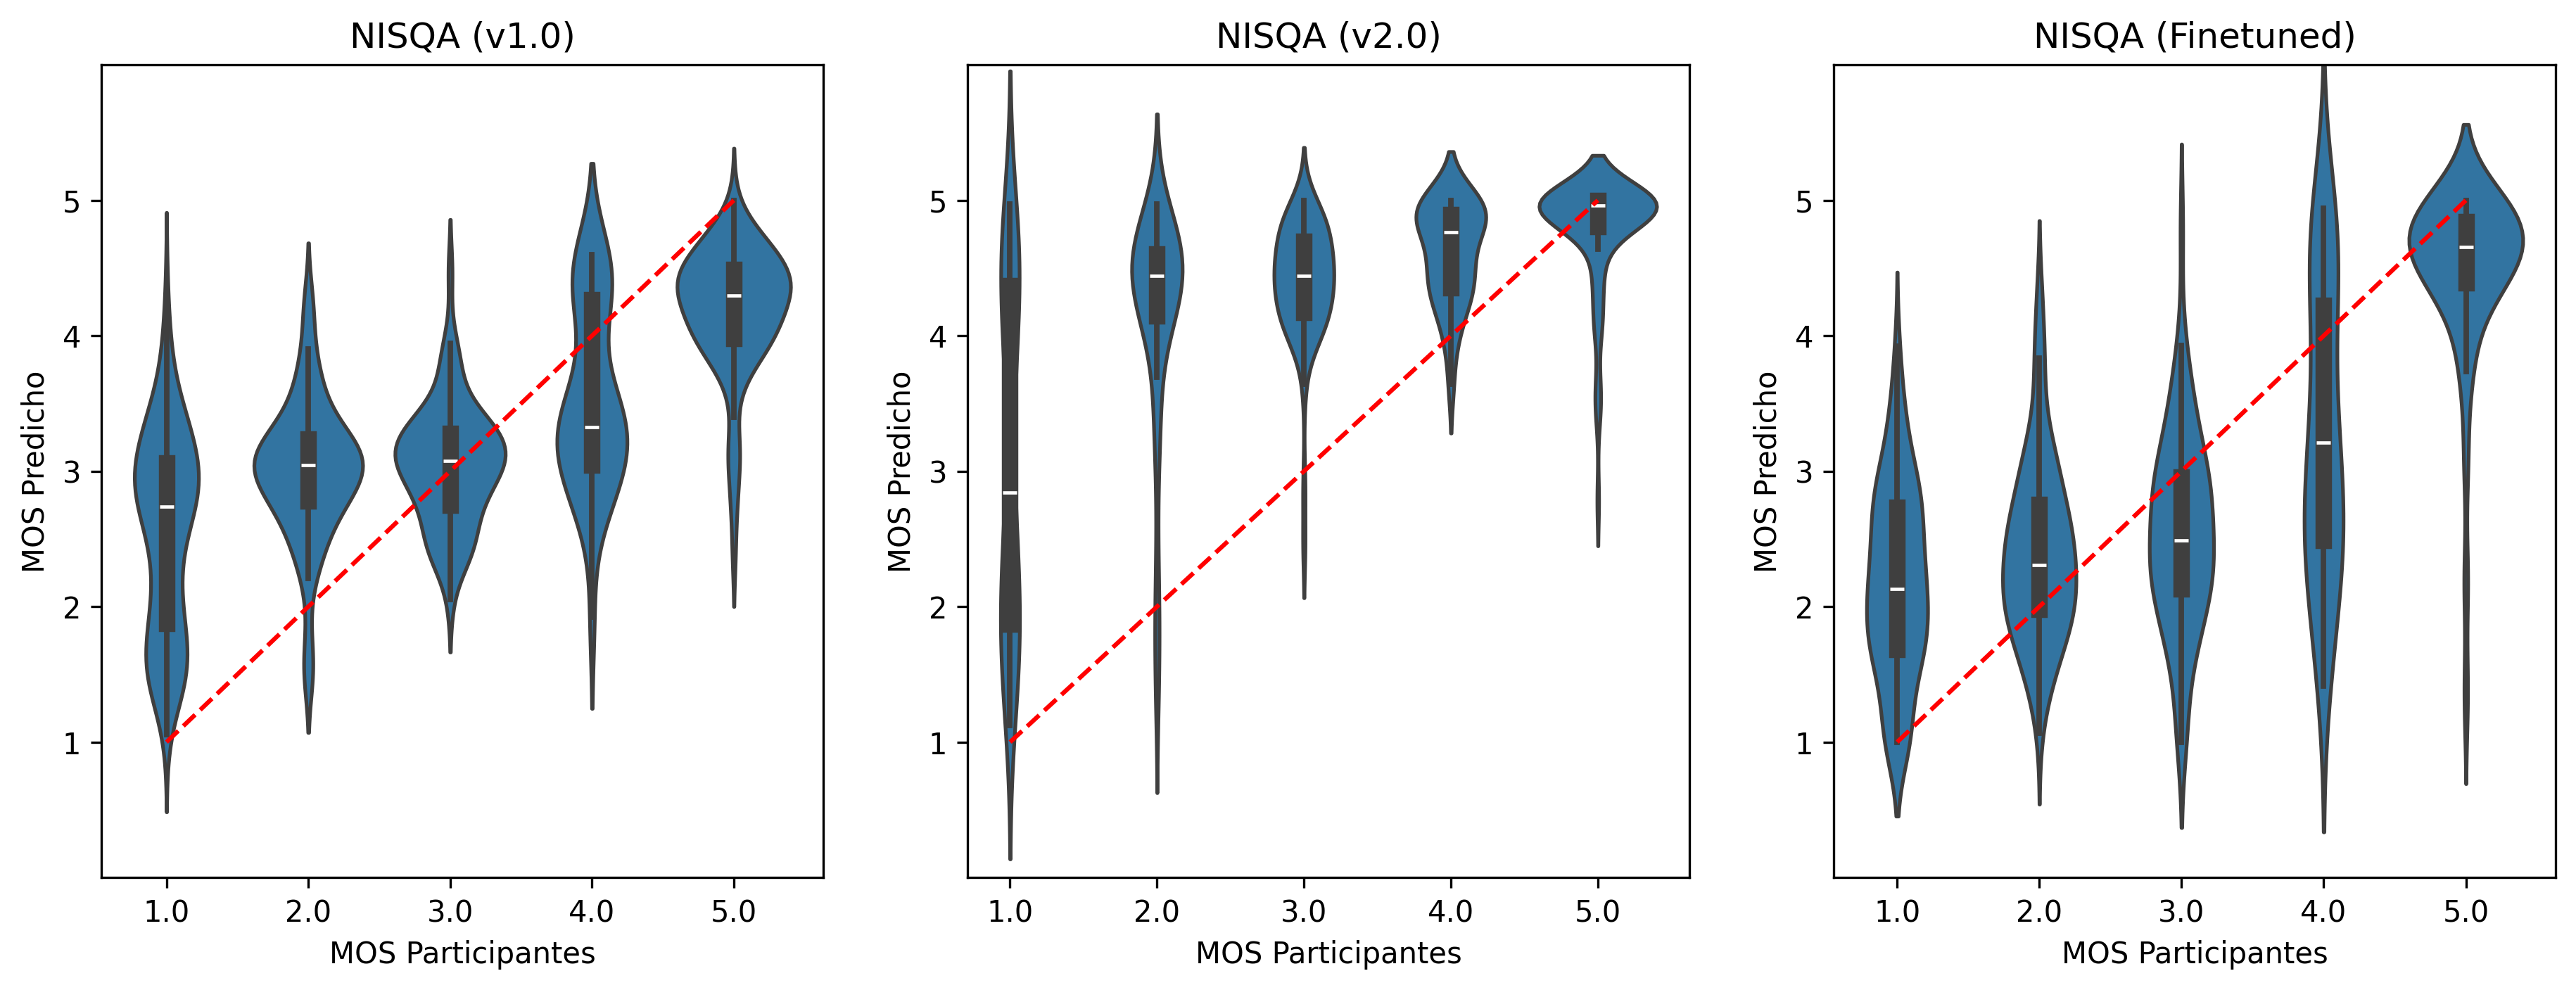

In [13]:
# now, lets plot the same data but with seaborn using a violin plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.violinplot(x='mos', y='mos_pred', data=NISQA_v1_paired, ax=ax[0])
ax[0].set_title('NISQA (v1.0)')
ax[0].set_xlabel('MOS Participantes')
ax[0].set_ylabel('MOS Predicho')
ax[0].plot([0, 4], [1, 5], 'r--')
# y labels 1-5
ax[0].set_yticks([1, 2, 3, 4, 5])
ax[0].set_ylim(0, 6)
sns.violinplot(x='mos', y='mos_pred', data=NISQA_v2_paired, ax=ax[1])
ax[1].set_title('NISQA (v2.0)')
ax[1].set_xlabel('MOS Participantes')
ax[1].set_ylabel('MOS Predicho')
ax[1].plot([0, 4], [1, 5], 'r--')
ax[1].set_yticks([1, 2, 3, 4, 5])
ax[1].set_ylim(0, 6)
sns.violinplot(x='mos', y='mos_pred', data=NISQA_finetuned_paired, ax=ax[2])
ax[2].set_title('NISQA (Finetuned)')
ax[2].set_xlabel('MOS Participantes')
ax[2].set_ylabel('MOS Predicho')
ax[2].plot([0, 4], [1, 5], 'r--')
ax[2].set_yticks([1, 2, 3, 4, 5])
ax[2].set_ylim(0, 6)
plt.show()


In [16]:
# print the average MOS values for each model
print('NISQA-TTS (v1.0) average MOS:', NISQA_v1_paired['mos'].mean())
print('NISQA (v2.0) average MOS:', NISQA_v2_paired['mos'].mean())
print('NISQA (Finetuned) average MOS:', NISQA_finetuned_paired['mos'].mean())

NISQA-TTS (v1.0) average MOS: 2.7205882352941178
NISQA (v2.0) average MOS: 2.7205882352941178
NISQA (Finetuned) average MOS: 2.7205882352941178


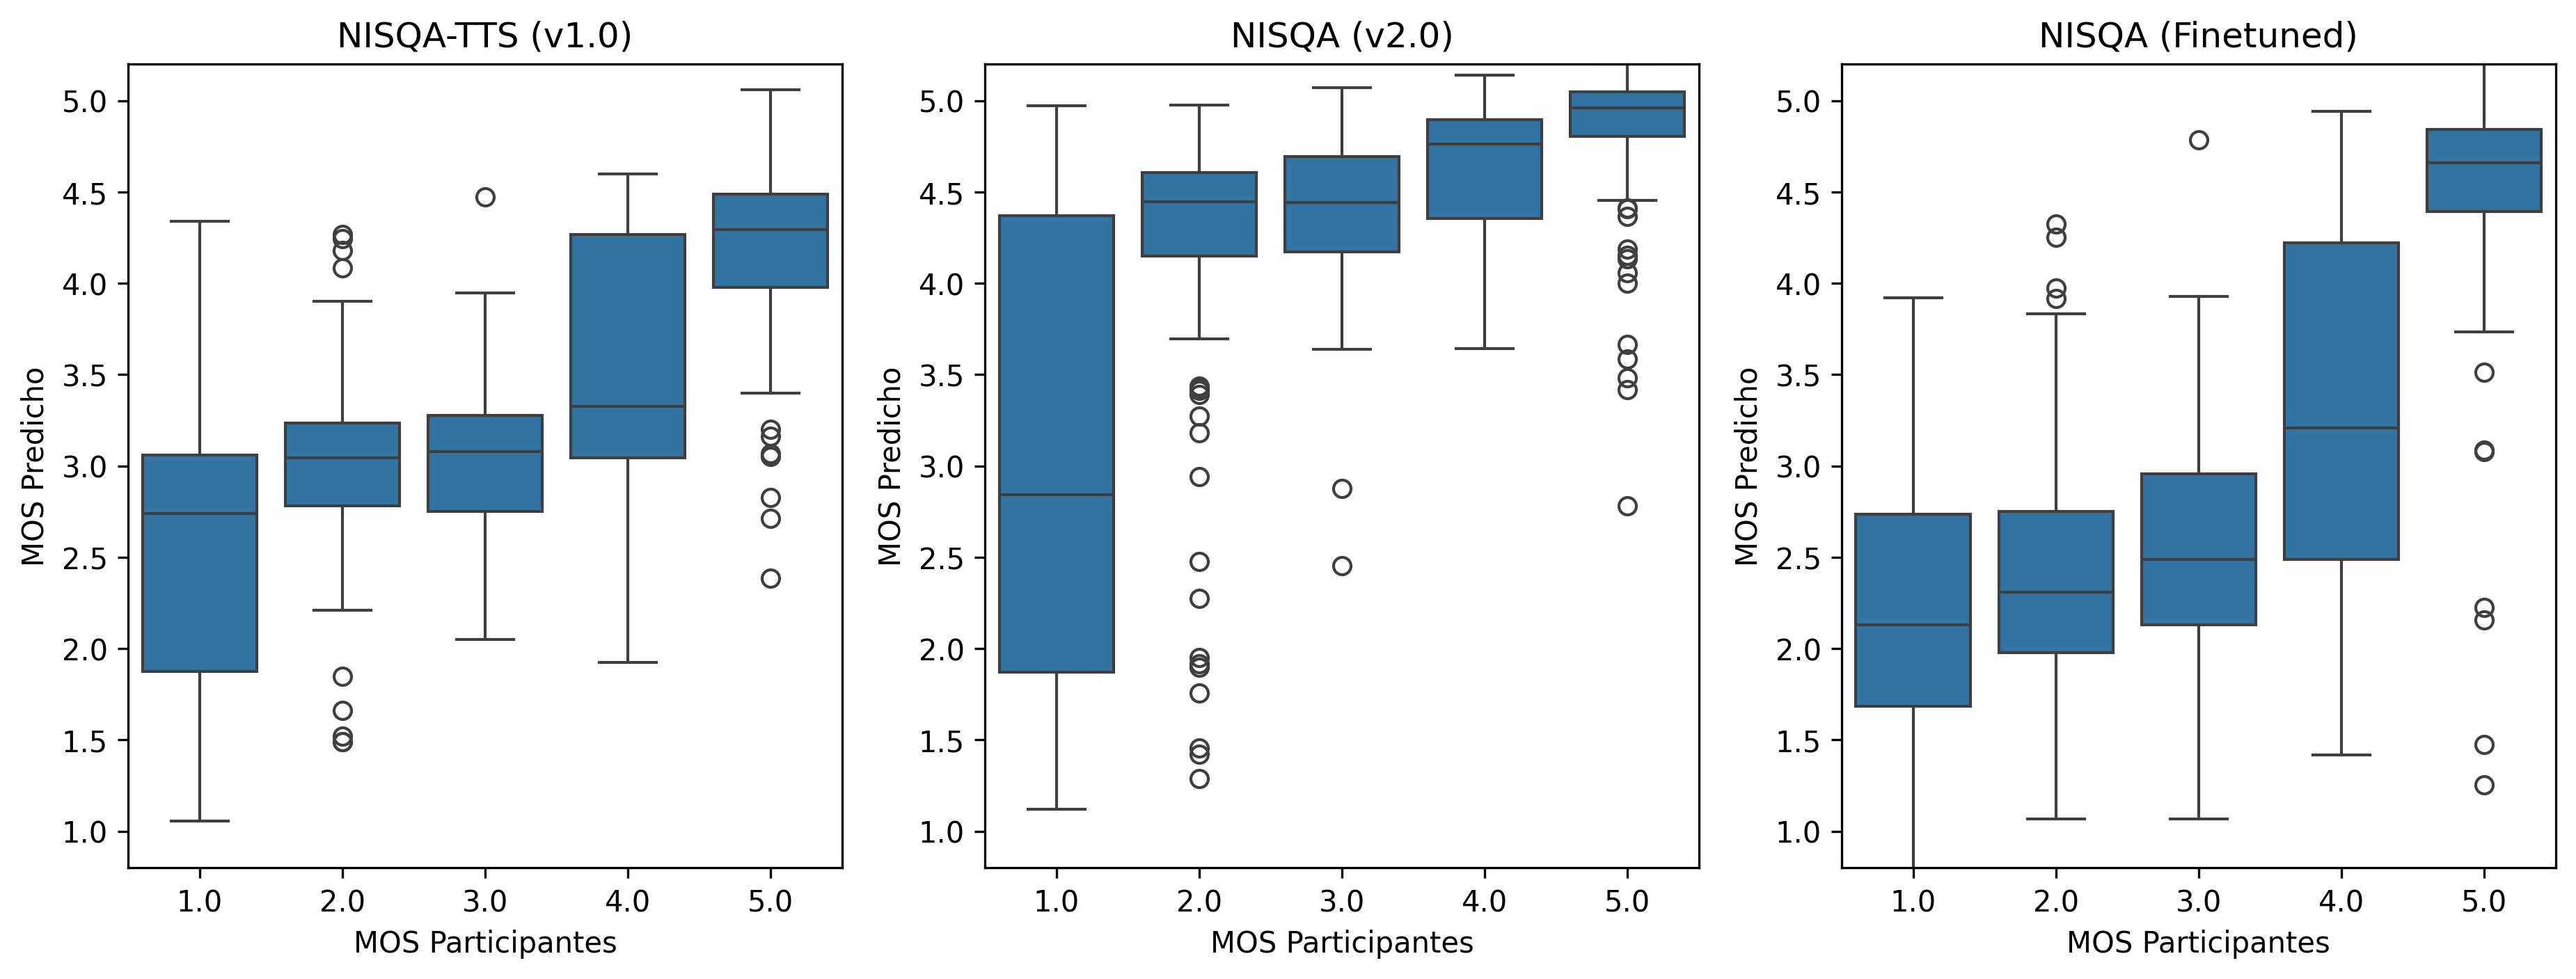

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='mos', y='mos_pred', data=NISQA_v1_paired, ax=ax[0])
ax[0].set_title('NISQA-TTS (v1.0)')
ax[0].set_xlabel('MOS Participantes')
ax[0].set_ylabel('MOS Predicho')
ax[0].set_ylim(0.8, 5.2)
sns.boxplot(x='mos', y='mos_pred', data=NISQA_v2_paired, ax=ax[1])
ax[1].set_title('NISQA (v2.0)')
ax[1].set_xlabel('MOS Participantes')
ax[1].set_ylabel('MOS Predicho')
ax[1].set_ylim(0.8, 5.2)
sns.boxplot(x='mos', y='mos_pred', data=NISQA_finetuned_paired, ax=ax[2])
ax[2].set_title('NISQA (Finetuned)')
ax[2].set_xlabel('MOS Participantes')
ax[2].set_ylabel('MOS Predicho')
ax[2].set_ylim(0.8, 5.2)
plt.show()
